In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Class 0: 226
Class 1: 22
Proportion: 10.2727 : 1


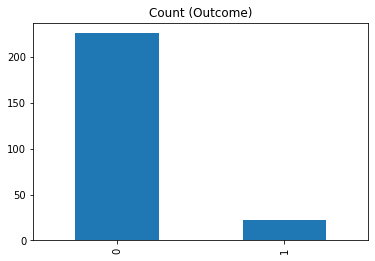

In [3]:
df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Book4.csv')

df = df.drop('Date', 1)
df = df.drop('Gender', 1)

target_count = df.Outcome.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (Outcome)');

In [4]:
df.head()

,5,Exercise,Stress,Fatigued,Sleep,Outcome
0,2,0,4.0,5.0,13.0,1
1,2,0,3.0,5.0,13.0,0
2,2,0,3.0,5.0,13.0,0
3,2,0,3.0,5.0,13.0,0
4,2,1,4.0,4.0,10.0,1


In [5]:
# Class count
count_class_0, count_class_1 = df.Outcome.value_counts()

# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

Random under-sampling:
1    22
0    22
Name: Outcome, dtype: int64


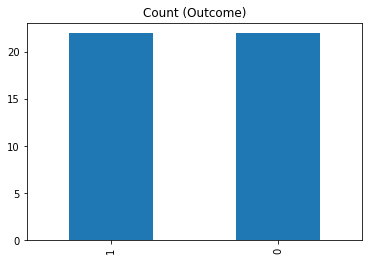

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

Random over-sampling:
1    226
0    226
Name: Outcome, dtype: int64


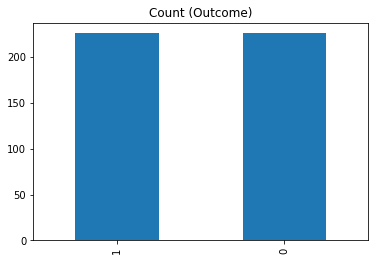

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');


In [8]:
df_test_over.head()

,5,Exercise,Stress,Fatigued,Sleep,Outcome
1,2,0,3.0,5.0,13.0,0
2,2,0,3.0,5.0,13.0,0
3,2,0,3.0,5.0,13.0,0
20,2,1,3.5,4.0,9.5,0
21,2,0,3.0,4.0,7.0,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.25,random_state=111)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

import numpy as np

predicted = model.predict(x_test)

print(np.mean(predicted == y_test))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predicted)*100)
print("\nSVM Classification Report\n")
print(classification_report(y_test,predicted))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predicted)))


#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predicted)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)



0.8495575221238938
[[47 10]
 [ 7 49]]
Accuracy score for SVM is: 84.95575221238938

SVM Classification Report

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        57
           1       0.83      0.88      0.85        56

    accuracy                           0.85       113
   macro avg       0.85      0.85      0.85       113
weighted avg       0.85      0.85      0.85       113


SVM AUCROC is 0.850
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[47 10]
 [ 7 49]]
Accuracy :  0.8495575221238938
Sensitivity :  0.8245614035087719
Specificity :  0.875


In [11]:
#LOGISTICAL REGRESSION
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.30,random_state=2)

#Training and Predicting
#Import the Logisitcal Regression Library from SKLearn
from sklearn.linear_model import LogisticRegression

#create instance of logistical regression model called logmodel
logmodel=LogisticRegression()
#pass the data to the logmodel
logmodel.fit(x_train,y_train)

#make predictions with model on unseen test data
predictions = logmodel.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for Logistical Regression Model is:",accuracy_score(y_test, predictions)*100)
print("\nLogisitcal Regression Classification Report\n")
print(classification_report(y_test,predictions))
print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))

Accuracy score for Logistical Regression Model is: 92.64705882352942

Logisitcal Regression Classification Report

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        66
           1       0.88      1.00      0.93        70

    accuracy                           0.93       136
   macro avg       0.94      0.92      0.93       136
weighted avg       0.94      0.93      0.93       136


Logisitcal Regression AUCROC is 0.924


In [12]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score


cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LOGISTICAL REGRESSION')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))


Confusion Matrix : 
 [[56 10]
 [ 0 70]]
Accuracy :  0.9264705882352942
Sensitivity :  0.8484848484848485
Specificity :  1.0
Precision: 0.875000


NameError: name 'auc' is not defined

In [13]:
#DECISION TREE WITH GINI INDEX

#first 3 attributes are used for the x-axis
X = df_test_over.values[:, 0:4]
#attributes after number 3 are used for the y-axis
Y = df_test_over.values[:,5]

#import Accuracy Score to guage performance
from sklearn.metrics import accuracy_score

#Split the dataset using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 333)


#implement a depth of 5, with a minimum of 5 leaf nodes and a random state of 100
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state =333,
                               max_depth=5, min_samples_leaf=15)

#pass the training data to the decision tree
dt_clf_gini.fit(X_train, y_train)

#make prediction using unseen test data
y_pred_gini = dt_clf_gini.predict(X_test)

#methods used to show the performance metrics of the model
print ("\nAccuracy Score for Desicion Tree Model using Gini Index is ", accuracy_score(y_test,y_pred_gini)*100 )
print("\nDesicion Tree  Classification Report\n")
print(classification_report(y_test,y_pred_gini))



#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_gini)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)


Accuracy Score for Desicion Tree Model using Gini Index is  88.97058823529412

Desicion Tree  Classification Report

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88        64
         1.0       0.87      0.93      0.90        72

    accuracy                           0.89       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.89      0.89      0.89       136

Confusion Matrix for DT: 
 [[54 10]
 [ 5 67]]
Accuracy :  0.8897058823529411
Sensitivity :  0.84375
Specificity :  0.9305555555555556
Precision: 0.870130


In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_gini)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LOGISTICAL REGRESSION')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_gini)))


NameError: name 'auc' is not defined

In [15]:
#RANDOM FOREST

X = df_test_over.iloc[:, :-3].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))


Accuracy Score for Random Forest Model is 85.294

Random Forest roc-auc measure is 0.944

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        56
           1       0.88      0.88      0.88        80

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136



In [16]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_class_rf)
print('Confusion Matrix for rf: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_class_rf)
print('Precision: %f' % precision)

Confusion Matrix for rf: 
 [[46 10]
 [10 70]]
Accuracy :  0.8529411764705882
Sensitivity :  0.8214285714285714
Specificity :  0.875
Precision: 0.875000


In [17]:
#NEURAL NETWORK0

## normalize the data
X = df_test_over.iloc[:, :4].values



#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation

model_1 = Sequential([
    Dense(12, input_shape=(4,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .002), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))


W0812 09:43:31.809188  7276 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 09:43:31.828167  7276 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 09:43:31.833154  7276 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 09:43:31.873015  7276 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 09:43:31.879034  7276 deprecation_wrapper.py:119] From C:\Users\jamie\Anac


************Start of Nerual Netwrok Summary*********
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Train on 361 samples, validate on 91 samples
Epoch 1/500
361/361 [==============================] - 0s 711us/step - loss: 0.7713 - acc: 0.4017 - val_loss: 0.7529 - val_acc: 0.4615
Epoch 2/500
361/361 [==============================] - 0s 28us/step - loss: 0.7627 - acc: 0.4017 - val_loss: 0.7442 - val_acc: 0.4615
Epoch 3/500
361/361 [==============================] - 0s 25us/step - loss: 0.7543 - acc: 0.4017 - val_loss: 0.7358 - val_acc: 0.4615
Epoch 4/500
361/361 [===================

361/361 [==============================] - 0s 28us/step - loss: 0.4890 - acc: 0.8753 - val_loss: 0.4731 - val_acc: 0.8791
Epoch 57/500
361/361 [==============================] - 0s 25us/step - loss: 0.4860 - acc: 0.8753 - val_loss: 0.4703 - val_acc: 0.8791
Epoch 58/500
361/361 [==============================] - 0s 30us/step - loss: 0.4831 - acc: 0.8753 - val_loss: 0.4675 - val_acc: 0.8791
Epoch 59/500
361/361 [==============================] - 0s 33us/step - loss: 0.4803 - acc: 0.8753 - val_loss: 0.4647 - val_acc: 0.8791
Epoch 60/500
361/361 [==============================] - 0s 22us/step - loss: 0.4774 - acc: 0.8753 - val_loss: 0.4620 - val_acc: 0.8791
Epoch 61/500
361/361 [==============================] - 0s 28us/step - loss: 0.4746 - acc: 0.8753 - val_loss: 0.4593 - val_acc: 0.8791
Epoch 62/500
361/361 [==============================] - 0s 25us/step - loss: 0.4719 - acc: 0.8753 - val_loss: 0.4567 - val_acc: 0.8791
Epoch 63/500
361/361 [==============================] - 0s 25us/step

361/361 [==============================] - 0s 25us/step - loss: 0.3688 - acc: 0.9141 - val_loss: 0.3604 - val_acc: 0.9121
Epoch 117/500
361/361 [==============================] - 0s 25us/step - loss: 0.3674 - acc: 0.9141 - val_loss: 0.3592 - val_acc: 0.9121
Epoch 118/500
361/361 [==============================] - 0s 25us/step - loss: 0.3660 - acc: 0.9141 - val_loss: 0.3581 - val_acc: 0.9121
Epoch 119/500
361/361 [==============================] - 0s 25us/step - loss: 0.3648 - acc: 0.9141 - val_loss: 0.3568 - val_acc: 0.9121
Epoch 120/500
361/361 [==============================] - 0s 25us/step - loss: 0.3634 - acc: 0.9141 - val_loss: 0.3555 - val_acc: 0.9121
Epoch 121/500
361/361 [==============================] - 0s 25us/step - loss: 0.3621 - acc: 0.9141 - val_loss: 0.3544 - val_acc: 0.9121
Epoch 122/500
361/361 [==============================] - 0s 22us/step - loss: 0.3608 - acc: 0.9141 - val_loss: 0.3533 - val_acc: 0.9121
Epoch 123/500
361/361 [==============================] - 0s 25

361/361 [==============================] - 0s 25us/step - loss: 0.3064 - acc: 0.9169 - val_loss: 0.3046 - val_acc: 0.9121
Epoch 177/500
361/361 [==============================] - 0s 28us/step - loss: 0.3057 - acc: 0.9169 - val_loss: 0.3040 - val_acc: 0.9121
Epoch 178/500
361/361 [==============================] - 0s 22us/step - loss: 0.3049 - acc: 0.9169 - val_loss: 0.3033 - val_acc: 0.9121
Epoch 179/500
361/361 [==============================] - 0s 25us/step - loss: 0.3042 - acc: 0.9169 - val_loss: 0.3026 - val_acc: 0.9121
Epoch 180/500
361/361 [==============================] - 0s 25us/step - loss: 0.3034 - acc: 0.9169 - val_loss: 0.3020 - val_acc: 0.9121
Epoch 181/500
361/361 [==============================] - 0s 28us/step - loss: 0.3027 - acc: 0.9169 - val_loss: 0.3013 - val_acc: 0.9121
Epoch 182/500
361/361 [==============================] - 0s 25us/step - loss: 0.3019 - acc: 0.9169 - val_loss: 0.3007 - val_acc: 0.9121
Epoch 183/500
361/361 [==============================] - 0s 25

361/361 [==============================] - 0s 28us/step - loss: 0.2715 - acc: 0.9169 - val_loss: 0.2746 - val_acc: 0.9121
Epoch 237/500
361/361 [==============================] - 0s 22us/step - loss: 0.2711 - acc: 0.9169 - val_loss: 0.2743 - val_acc: 0.9121
Epoch 238/500
361/361 [==============================] - 0s 28us/step - loss: 0.2707 - acc: 0.9169 - val_loss: 0.2739 - val_acc: 0.9121
Epoch 239/500
361/361 [==============================] - 0s 25us/step - loss: 0.2702 - acc: 0.9169 - val_loss: 0.2736 - val_acc: 0.9121
Epoch 240/500
361/361 [==============================] - 0s 28us/step - loss: 0.2698 - acc: 0.9169 - val_loss: 0.2732 - val_acc: 0.9121
Epoch 241/500
361/361 [==============================] - 0s 28us/step - loss: 0.2694 - acc: 0.9169 - val_loss: 0.2728 - val_acc: 0.9121
Epoch 242/500
361/361 [==============================] - 0s 25us/step - loss: 0.2690 - acc: 0.9169 - val_loss: 0.2725 - val_acc: 0.9121
Epoch 243/500
361/361 [==============================] - 0s 25

361/361 [==============================] - 0s 25us/step - loss: 0.2501 - acc: 0.9169 - val_loss: 0.2570 - val_acc: 0.9121
Epoch 297/500
361/361 [==============================] - 0s 28us/step - loss: 0.2498 - acc: 0.9169 - val_loss: 0.2568 - val_acc: 0.9121
Epoch 298/500
361/361 [==============================] - 0s 28us/step - loss: 0.2495 - acc: 0.9169 - val_loss: 0.2566 - val_acc: 0.9121
Epoch 299/500
361/361 [==============================] - 0s 25us/step - loss: 0.2492 - acc: 0.9169 - val_loss: 0.2563 - val_acc: 0.9121
Epoch 300/500
361/361 [==============================] - 0s 28us/step - loss: 0.2489 - acc: 0.9169 - val_loss: 0.2561 - val_acc: 0.9121
Epoch 301/500
361/361 [==============================] - 0s 25us/step - loss: 0.2486 - acc: 0.9169 - val_loss: 0.2559 - val_acc: 0.9121
Epoch 302/500
361/361 [==============================] - 0s 28us/step - loss: 0.2483 - acc: 0.9169 - val_loss: 0.2557 - val_acc: 0.9121
Epoch 303/500
361/361 [==============================] - 0s 25

361/361 [==============================] - 0s 25us/step - loss: 0.2354 - acc: 0.9169 - val_loss: 0.2458 - val_acc: 0.9121
Epoch 357/500
361/361 [==============================] - 0s 25us/step - loss: 0.2353 - acc: 0.9169 - val_loss: 0.2457 - val_acc: 0.9121
Epoch 358/500
361/361 [==============================] - 0s 25us/step - loss: 0.2351 - acc: 0.9169 - val_loss: 0.2456 - val_acc: 0.9121
Epoch 359/500
361/361 [==============================] - 0s 22us/step - loss: 0.2349 - acc: 0.9169 - val_loss: 0.2454 - val_acc: 0.9121
Epoch 360/500
361/361 [==============================] - 0s 28us/step - loss: 0.2347 - acc: 0.9169 - val_loss: 0.2453 - val_acc: 0.9121
Epoch 361/500
361/361 [==============================] - 0s 25us/step - loss: 0.2345 - acc: 0.9169 - val_loss: 0.2452 - val_acc: 0.9121
Epoch 362/500
361/361 [==============================] - 0s 25us/step - loss: 0.2343 - acc: 0.9169 - val_loss: 0.2450 - val_acc: 0.9121
Epoch 363/500
361/361 [==============================] - 0s 25

Epoch 416/500
361/361 [==============================] - 0s 25us/step - loss: 0.2260 - acc: 0.9114 - val_loss: 0.2388 - val_acc: 0.9121
Epoch 417/500
361/361 [==============================] - 0s 22us/step - loss: 0.2259 - acc: 0.9114 - val_loss: 0.2387 - val_acc: 0.9121
Epoch 418/500
361/361 [==============================] - 0s 25us/step - loss: 0.2257 - acc: 0.9114 - val_loss: 0.2386 - val_acc: 0.9121
Epoch 419/500
361/361 [==============================] - 0s 28us/step - loss: 0.2256 - acc: 0.9114 - val_loss: 0.2385 - val_acc: 0.9121
Epoch 420/500
361/361 [==============================] - 0s 28us/step - loss: 0.2255 - acc: 0.9114 - val_loss: 0.2384 - val_acc: 0.9121
Epoch 421/500
361/361 [==============================] - 0s 25us/step - loss: 0.2253 - acc: 0.9114 - val_loss: 0.2383 - val_acc: 0.9121
Epoch 422/500
361/361 [==============================] - 0s 25us/step - loss: 0.2252 - acc: 0.9114 - val_loss: 0.2382 - val_acc: 0.9121
Epoch 423/500
361/361 [=========================

Epoch 476/500
361/361 [==============================] - 0s 25us/step - loss: 0.2189 - acc: 0.9114 - val_loss: 0.2338 - val_acc: 0.9121
Epoch 477/500
361/361 [==============================] - 0s 25us/step - loss: 0.2188 - acc: 0.9114 - val_loss: 0.2337 - val_acc: 0.9121
Epoch 478/500
361/361 [==============================] - 0s 25us/step - loss: 0.2187 - acc: 0.9114 - val_loss: 0.2336 - val_acc: 0.9121
Epoch 479/500
361/361 [==============================] - 0s 27us/step - loss: 0.2186 - acc: 0.9114 - val_loss: 0.2335 - val_acc: 0.9121
Epoch 480/500
361/361 [==============================] - 0s 25us/step - loss: 0.2185 - acc: 0.9114 - val_loss: 0.2335 - val_acc: 0.9121
Epoch 481/500
361/361 [==============================] - 0s 25us/step - loss: 0.2184 - acc: 0.9114 - val_loss: 0.2334 - val_acc: 0.9121
Epoch 482/500
361/361 [==============================] - 0s 25us/step - loss: 0.2183 - acc: 0.9114 - val_loss: 0.2333 - val_acc: 0.9121
Epoch 483/500
361/361 [=========================

In [18]:

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score
precision = precision_score(y_test, y_pred_class_nn_1)
print('Precision: %f' % precision)

cm=confusion_matrix(y_test, y_pred_class_nn_1)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Precision: 0.907407
Confusion Matrix : 
 [[34  5]
 [ 3 49]]
Accuracy :  0.9120879120879121
Sensitivity :  0.8717948717948718
Specificity :  0.9423076923076923



Nerual Network AUCROC is 0.956


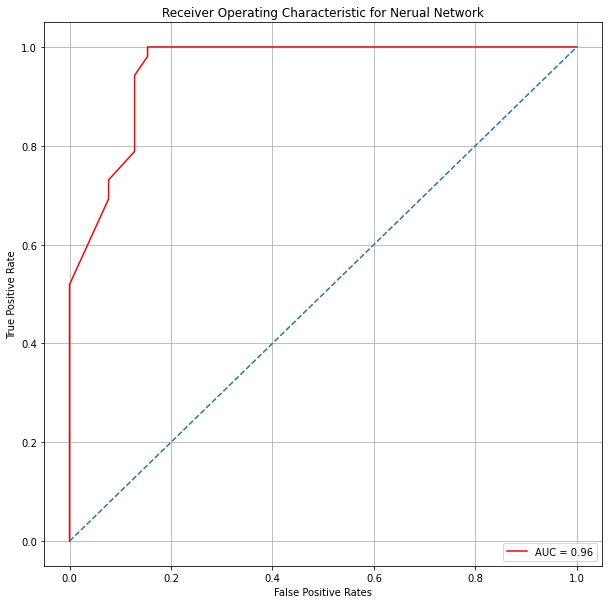

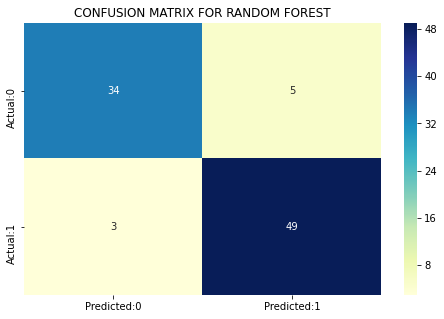

In [19]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nNerual Network AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))


#create a confusion matrix to visually display the postive and negative prediction rate
cmrf=confusion_matrix(y_test,y_pred_class_nn_1)
conf_matrixrf=pd.DataFrame(data=cmrf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")
sns.heatmap(conf_matrixrf, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig('cmrfe.png')

In [20]:

# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.20,random_state=321)

clf = SVC(kernel='linear', C = 0.1)

# fitting x samples and y classes 
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predictions)*100)
print("\nSVM Classification Report\n")
print(classification_report(y_test,predictions))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)


Accuracy score for SVM is: 93.4065934065934

SVM Classification Report

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.96      0.91      0.93        47

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91


SVM AUCROC is 0.935
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[42  2]
 [ 4 43]]
Accuracy :  0.9340659340659341
Sensitivity :  0.9545454545454546
Specificity :  0.9148936170212766
Precision: 0.955556


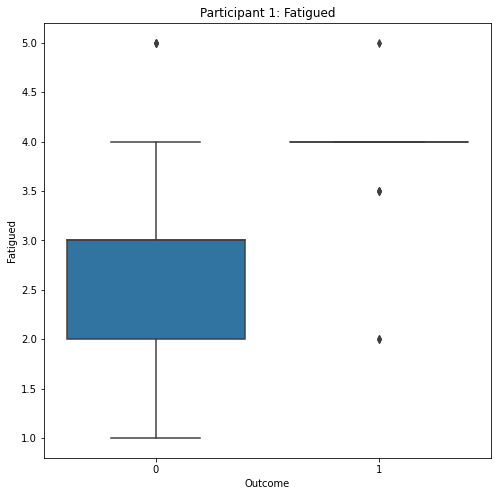

In [21]:
plt.figure(figsize = (8,8))
plt.title("Participant 1: Fatigued")
sns.boxplot(x='Outcome', y='Fatigued', data=df)